# Determination of the optimal tilt angle for a solar panel placed at Kathmandu.

- By: Sagun Shakya (121922502019)
- GITAM Institute of Science.

## List of variables used.
- n: day number as per Klein (1997).
- delta: corresponding values for angle of declination (in degrees).
- omegas: sunset hour angle (in degrees).
- omegam: sunset hour angle for the mean day for a tilted surface (in degrees).
- rb: monthly average daily geometric factor.
- g: global Solar Irradiance for 'phi' degrees latitude.
- gd: diffused Solar Irradiance for 'phi' degrees latitude.
- gt_est: estimated value of net irradiance falling on a tilted surface tilted at an angle 'beta'.
- beta: tilt angles (in degrees).
- beta_opt: optimal tilt angle for that month (in degrees).

### Importing all the necessay libraries.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

### Fetching the data.

In [102]:
os.chdir(r'D:\Sagun Shakya\Python\Data Sets')
ktm = pd.read_excel('KTM_05.xlsx')

In [103]:
ktm.head(12)

,month,g,g_t_given,diff_to_glob
0,1,67.17,83.94,58
1,2,100.97,118.37,51
2,3,158.39,172.56,41
3,4,198.19,201.31,35
4,5,225.34,211.18,34
5,6,213.26,194.26,38
6,7,166.99,157.72,57
7,8,153.76,151.11,62
8,9,156.05,165.86,46
9,10,123.91,145.16,31


### To determine the Diffused solar radiation.

In [104]:
ktm['gd'] = round((ktm['g'] * ktm['diff_to_glob'] / 100), 2)

In [105]:
ktm

,month,g,g_t_given,diff_to_glob,gd
0,1,67.17,83.94,58,38.96
1,2,100.97,118.37,51,51.49
2,3,158.39,172.56,41,64.94
3,4,198.19,201.31,35,69.37
4,5,225.34,211.18,34,76.62
5,6,213.26,194.26,38,81.04
6,7,166.99,157.72,57,95.18
7,8,153.76,151.11,62,95.33
8,9,156.05,165.86,46,71.78
9,10,123.91,145.16,31,38.41


### Latitude of KTM.

In [106]:
phi = 27.738 #degrees

### The values of n for different months as per Klein (1997):

In [107]:
n = np.array([17, 47, 75, 105, 135, 162, 198, 228, 258, 288, 318, 344])

### Angle of declination.

In [77]:
x = np.linspace(0,366,500)
delta = 23.45 * np.sin ( np.radians((360 /365 ) * (284 + x)) );

### Plotting the angle of declination.

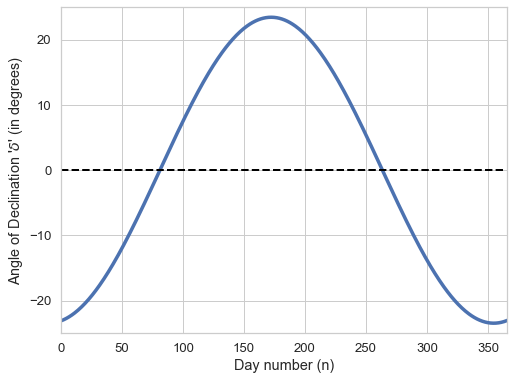

In [108]:
plt.figure(figsize = (8,6))
sns.set(style = 'whitegrid', font_scale = 1.2)
plt.plot(x, delta, linewidth = 3.5)
plt.plot(np.arange(366), np.zeros(366), '--', color = 'black', linewidth = 2)
plt.xlim(0,366)
plt.ylim(-25,25)
plt.xlabel('Day number (n)')
plt.ylabel("Angle of Declination '$\delta$' (in degrees)")
plt.show()

### Setting up dictionaries to store monthly values of day number, G and Gd.

In [109]:
#The values of n for different months as per Klein (1997):
n = np.array([17, 47, 75, 105, 135, 162, 198, 228, 258, 288, 318, 344])

g = np.array(ktm['g'])
gd = np.array(ktm['gd'])
'''print(g)
print(gd)'''

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

N = dict()
for ii in range(len(n)):
    N[months[ii]] = n[ii]


G = dict()
for ii in range(len(g)):
    G[months[ii]] = g[ii]
    
GD = dict()
for ii in range(len(gd)):
    GD[months[ii]] = gd[ii]

print(N)
print(G)
print(GD)

{'jan': 17, 'feb': 47, 'mar': 75, 'apr': 105, 'may': 135, 'jun': 162, 'jul': 198, 'aug': 228, 'sep': 258, 'oct': 288, 'nov': 318, 'dec': 344}
{'jan': 67.17, 'feb': 100.97, 'mar': 158.39, 'apr': 198.19, 'may': 225.34, 'jun': 213.26, 'jul': 166.99, 'aug': 153.76, 'sep': 156.05, 'oct': 123.91, 'nov': 121.05, 'dec': 119.08}
{'jan': 38.96, 'feb': 51.49, 'mar': 64.94, 'apr': 69.37, 'may': 76.62, 'jun': 81.04, 'jul': 95.18, 'aug': 95.33, 'sep': 71.78, 'oct': 38.41, 'nov': 52.05, 'dec': 41.68}


### The declination function.

In [110]:
def delta(n):
    d = 23.45 * np.sin ( np.radians((360 /365 ) * (284 + n)) );
    return d

### The estimation of Irradiance value for a solar panel tilted at beta degrees in the given month.

In [111]:
def gt_est(n, beta, month):
    '''Takes in three parameters namely:
    n i.e the day number for each month.
    beta i.e the experimental tilt angle (in degrees)
    month i.e jan,feb,mar and so on.'''
    
    #The sunset hour angle (in degrees).
    omegas = np.arccos( (-np.tan( np.radians(phi) ) ) * (np.tan ( np.radians(delta(n)) ) ) )

    #The sunset hour angle for the mean day for a tilted surface:
    x = np.arccos( (-np.tan( np.radians(phi - beta) ) ) * (np.tan ( np.radians(delta(n)) ) ) )
    omegam = min(omegas, x)
    
    #To calculate rb in the form of (a + b)/ (c + d).
    a = np.cos( np.radians(phi - beta) ) * np.cos( np.radians(delta(n)) ) * np.cos( np.radians(omegam) ) 
    b = np.radians(omegam) * np.sin( np.radians(phi - beta) ) * np.sin( np.radians(delta(n)) )
    c = np.cos( np.radians(phi) ) * np.cos( np.radians(delta(n)) ) * np.cos( np.radians(omegas) )
    d = np.radians(omegas) * np.sin( np.radians(phi) ) * np.sin( np.radians(delta(n)) )
    
    rb = (a + b)/ (c + d)
    
    # To calculate the diffusion factor, rd.
    rd = (1 + np.cos( np.radians(beta) ) )/2
    
    # To calculate the reflectance factor, Rr.
    rho_g = 0.2      # Ground reflectance.
    Rr = rho_g * ((1 - np.cos( np.radians(beta) ) )/2)
    
    #The net irradiance falling on a tilted surface tilted at an angle 'beta'.
    gt_est = ((G[month] - GD[month]) * rb) + (rd * GD[month]) + (Rr * G[month])
    
    return gt_est


    
    

### Exemplar value. 
- Here, 
     - n = day number for January.
     - beta = 45 degrees.
     - month = January.

In [112]:
gt_est(N['jan'] ,beta = 45, month = 'jan' )

65.89245949846834

### Creating a grand dataframe to store the Gt values for each month varying the tilt from 0 degrees (horizontal) to 90 degrees.

In [113]:
GT_dict = dict()
for jj in months:
    GT_dict[jj] = np.array([gt_est(N[jj], ii, jj) for ii in range(90+1)]).round(2)

GT_df = pd.DataFrame(GT_dict)
GT_df.head(20)

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,67.17,100.97,158.39,198.19,225.34,213.26,166.99,153.76,156.05,123.91,121.05,119.08
1,67.43,101.42,159.23,199.34,226.64,214.41,167.61,154.27,156.81,124.69,121.68,119.79
2,67.67,101.85,160.04,200.44,227.90,215.51,168.20,154.76,157.53,125.44,122.29,120.48
3,67.91,102.26,160.82,201.50,229.10,216.56,168.76,155.21,158.22,126.16,122.87,121.14
4,68.13,102.65,161.56,202.51,230.25,217.57,169.29,155.64,158.88,126.85,123.43,121.78
5,68.34,103.02,162.27,203.48,231.35,218.53,169.79,156.04,159.50,127.52,123.96,122.39
6,68.53,103.37,162.94,204.40,232.40,219.45,170.25,156.42,160.10,128.15,124.47,122.97
7,68.71,103.70,163.57,205.28,233.39,220.31,170.68,156.76,160.66,128.76,124.94,123.52
8,68.88,104.01,164.18,206.11,234.34,221.13,171.08,157.08,161.18,129.34,125.40,124.04
9,69.04,104.30,164.74,206.89,235.23,221.90,171.45,157.36,161.68,129.88,125.82,124.54


### Statistical Summary for all months.

In [119]:
 GT_df.describe().round(2)

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
count,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00
mean,61.85,93.96,149.52,188.33,213.93,201.01,152.92,139.87,145.97,119.08,114.30,114.06
std,8.67,13.22,21.21,27.02,30.85,28.97,21.94,20.02,20.77,16.83,16.00,15.92
min,41.36,62.23,97.59,121.62,137.89,130.31,101.47,93.39,95.70,77.04,75.15,74.44
25%,55.89,85.14,135.96,171.42,194.56,182.40,137.67,125.72,132.34,108.90,104.06,104.30
50%,65.89,100.55,159.42,200.44,227.90,214.48,162.90,148.57,156.05,126.45,121.76,121.14
75%,69.01,104.70,166.49,209.84,238.52,224.23,171.15,156.74,162.72,132.43,127.11,126.70
max,69.89,106.11,168.92,213.03,242.16,227.54,173.33,158.65,165.01,134.49,128.94,128.62


### Optimal Angles and Max Gt values. 

In [122]:
for ii in months:
    jan_max = GT_df[ii].max()

    print(GT_df[ GT_df[ii] == jan_max][ii], '\n')


20    69.89
Name: jan, dtype: float64 

22    106.11
Name: feb, dtype: float64 

24    168.92
Name: mar, dtype: float64 

25    213.03
Name: apr, dtype: float64 

25    242.16
Name: may, dtype: float64 

24    227.54
Name: jun, dtype: float64 

19    173.33
20    173.33
Name: jul, dtype: float64 

18    158.65
19    158.65
Name: aug, dtype: float64 

23    165.01
Name: sep, dtype: float64 

26    134.49
Name: oct, dtype: float64 

24    128.94
Name: nov, dtype: float64 

26    128.62
Name: dec, dtype: float64 



### Locating the optimum angle using loc method in the index.
- This is just for testing purpose.

In [145]:
jan_max = GT_df['jan'].max()                     # Max. Gt value.
GT_df.loc[GT_df['jan'] == jan_max].index[0]      # Optimum tilt angle for January.

20

### Storing the maximum value of Gt in 'gt_max' array and the corresponding tilt in 'beta_opt' array for each month.

In [149]:
gt_max = list()
beta_opt = list()

for ii in months:
    month_max = GT_df[ii].max()                                    # Max. Gt value.
    month_beta_opt = GT_df.loc[GT_df[ii] == month_max].index[0]    # Monthly optimum Tilt angle.
    
    gt_max.append(month_max)
    beta_opt.append(month_beta_opt)
    
gt_max = np.array(gt_max)
beta_opt = np.array(beta_opt)

### Creating a dataframe for the above.

In [158]:
optimum = pd.DataFrame({'optimum_tilt':beta_opt, 'gt_max_values':gt_max}, index = months)
optimum

,optimum_tilt,gt_max_values
jan,20,69.89
feb,22,106.11
mar,24,168.92
apr,25,213.03
may,25,242.16
jun,24,227.54
jul,19,173.33
aug,18,158.65
sep,23,165.01
oct,26,134.49


# Data Visualization.

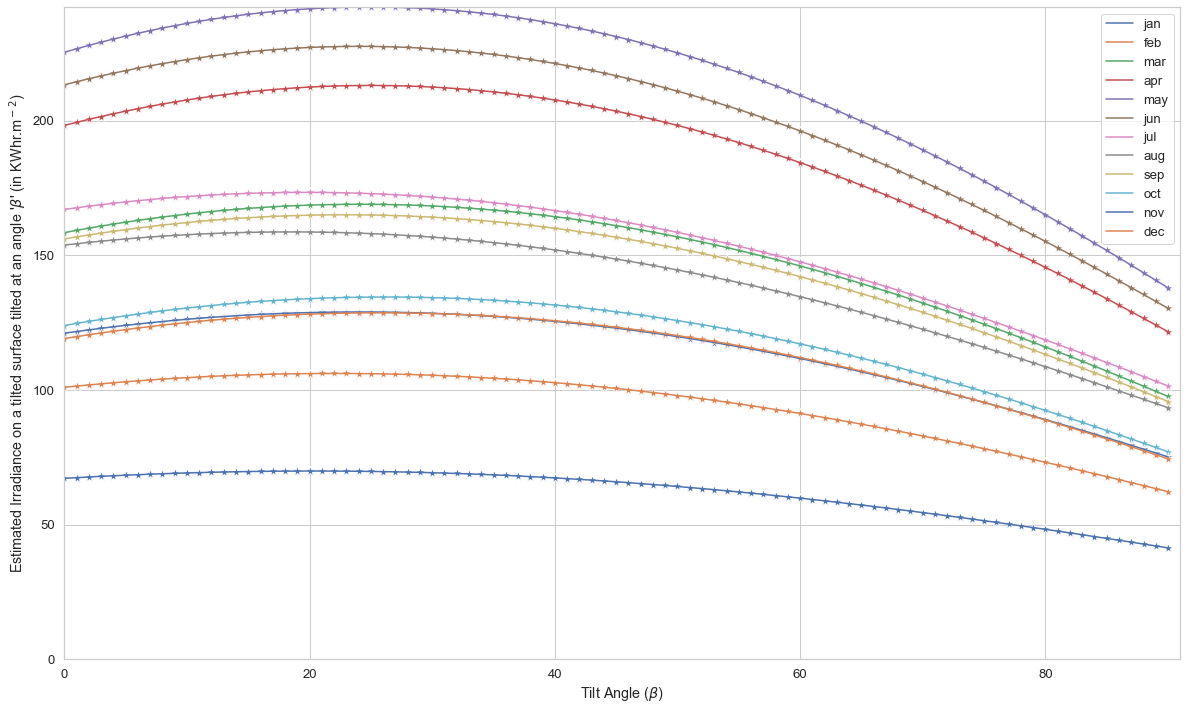

In [159]:
plt.figure(figsize = (20,12))
sns.set(style = 'whitegrid', font_scale = 1.2)

for ii in months:
    sns.scatterplot(x = GT_df.index, y = GT_df[ii], marker = '*', s = 100)
    
for ii in months:
    plt.plot(GT_df.index, GT_df[ii])
plt.xlabel(r'Tilt Angle ($\beta$)')
plt.ylabel(r"Estimated Irradiance on a tilted surface tilted at an angle '$\beta$' (in KWhr.m$^-$$^2$)")
plt.xlim(0,91)
plt.ylim(0,GT_df.max().max())
plt.legend(months)
plt.show()